In [1]:
from random import choices, expovariate
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
"""
Stochastic chemical reaction: Gillespie Algorithm
Adapted from: Chemical and Biomedical Enginnering Calculations Using Python Ch.4-3
Reaction of A <-> B with rate constants k1 & k2
"""
class Gillespie():
    def __init__(self, propensityFuncs, actionFuncs, parameters=None):
        self.propensityFuncs = propensityFuncs
        self.actionFuncs = actionFuncs
        self.parameters = parameters
    def run(self, u0, tend, tstart=0):
        # Setup
        t = tstart
        p = self.parameters
        u = np.asarray(u0)
        us = [u.copy()]
        ts = [t]
        while t < tend:
            # propensities of reactions
            ps = [f(u, p, t) for f in self.propensityFuncs]
            pTotal = sum(ps)
            dt = expovariate(pTotal)
            # Choose an action by the weight of each propensities, and update the state variable
            act = choices(actionFuncs, weights=ps)[0]
            u = np.asarray(act(u, p, t))
            t += dt
            us.append(u.copy())
            ts.append(t)
        return np.array(ts), np.array(us)

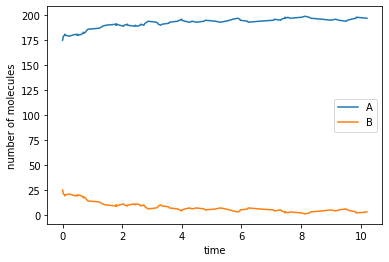

In [3]:
parameters = {"k1": 2.2e-2, "k2": 6.7e-1}
propensityFuncs = (lambda u, p, t: p["k1"] * u[0], 
                   lambda u, p, t: p["k2"] * u[1])
actionFuncs = (lambda u, p, t: [u[0] - 1, u[1] + 1], 
               lambda u, p, t: [u[0] + 1, u[1] - 1])
ssa = Gillespie(propensityFuncs = propensityFuncs,
                actionFuncs = actionFuncs,
                parameters = parameters)
ts, us = ssa.run([175, 25], 10.0)

fig, ax = plt.subplots()
ax.plot(ts, us[:, 0], label="A")
ax.plot(ts, us[:, 1], label="B")
ax.set_xlabel('time')
ax.set_ylabel('number of molecules')
ax.legend(loc='best')

In [7]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [8]:
def velocidad_producto(S):
    return vmax * S / (Km + S)
print (velocidad_producto(S))

NameError: name 'S' is not defined

In [9]:
# simular 
Km = 6.75e-1
vmax = 2.38e-2
# valores de sustrato 
S = np.linspace(0, 20, 80)
print(S)

[ 0.          0.25316456  0.50632911  0.75949367  1.01265823  1.26582278
  1.51898734  1.7721519   2.02531646  2.27848101  2.53164557  2.78481013
  3.03797468  3.29113924  3.5443038   3.79746835  4.05063291  4.30379747
  4.55696203  4.81012658  5.06329114  5.3164557   5.56962025  5.82278481
  6.07594937  6.32911392  6.58227848  6.83544304  7.08860759  7.34177215
  7.59493671  7.84810127  8.10126582  8.35443038  8.60759494  8.86075949
  9.11392405  9.36708861  9.62025316  9.87341772 10.12658228 10.37974684
 10.63291139 10.88607595 11.13924051 11.39240506 11.64556962 11.89873418
 12.15189873 12.40506329 12.65822785 12.91139241 13.16455696 13.41772152
 13.67088608 13.92405063 14.17721519 14.43037975 14.6835443  14.93670886
 15.18987342 15.44303797 15.69620253 15.94936709 16.20253165 16.4556962
 16.70886076 16.96202532 17.21518987 17.46835443 17.72151899 17.97468354
 18.2278481  18.48101266 18.73417722 18.98734177 19.24050633 19.49367089
 19.74683544 20.        ]


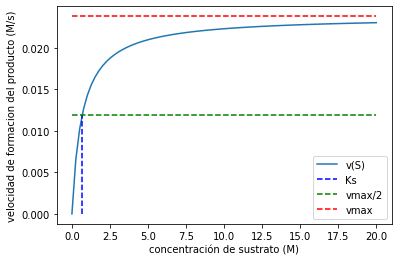

In [10]:

plt.plot(S, velocidad_producto(S))

plt.plot([Km, Km], [0, 0.0119], "b--")
plt.plot(S, np.ones_like(S) * vmax / 2, "g--")
plt.plot(S, np.ones_like(S)*vmax, "r--")
plt.xlabel("concentración de sustrato (M)")
plt.ylabel("velocidad de formacion del producto (M/s)")
plt.legend(["v(S)", "Ks", "vmax/2", "vmax"])

In [11]:
# establecer modelo 
def modelo(s, t):
    # variables de estado
    S = s[0]
    ES = s[1]
    E = s[2]
    P = s[3]

    # balance para S
    dSdt = -k1*E*S + kin*ES
    # balance para el comlejo ES
    dESdt = k1*E*S - kin*ES - k2*ES
    # balance para E
    dEdt = - dESdt
    # balance para P 
    dPdt = k2*ES
    return [dSdt, dESdt, dEdt, dPdt]

In [12]:
# establecer parametros 
k1, kin, k2 = 2.3e-2, 1.3e-2, 8.0e-1
# condiciones iniciales 
s =[10, 0, 1, 0]
# tiempo de integracion
time = np.linspace(0, 170,80 )
print(time
     )

[  0.           2.15189873   4.30379747   6.4556962    8.60759494
  10.75949367  12.91139241  15.06329114  17.21518987  19.36708861
  21.51898734  23.67088608  25.82278481  27.97468354  30.12658228
  32.27848101  34.43037975  36.58227848  38.73417722  40.88607595
  43.03797468  45.18987342  47.34177215  49.49367089  51.64556962
  53.79746835  55.94936709  58.10126582  60.25316456  62.40506329
  64.55696203  66.70886076  68.86075949  71.01265823  73.16455696
  75.3164557   77.46835443  79.62025316  81.7721519   83.92405063
  86.07594937  88.2278481   90.37974684  92.53164557  94.6835443
  96.83544304  98.98734177 101.13924051 103.29113924 105.44303797
 107.59493671 109.74683544 111.89873418 114.05063291 116.20253165
 118.35443038 120.50632911 122.65822785 124.81012658 126.96202532
 129.11392405 131.26582278 133.41772152 135.56962025 137.72151899
 139.87341772 142.02531646 144.17721519 146.32911392 148.48101266
 150.63291139 152.78481013 154.93670886 157.08860759 159.24050633
 161.392405

In [13]:
out = odeint(modelo, s, time)
S = out[:, 0]
ES = out[:, 1]
E = out[:, 2]
P = out[:, 3]
print(P)

[0.         0.2250693  0.5752406  0.92903461 1.27366648 1.60789643
 1.93173914 2.24535256 2.54891537 2.84261299 3.12663551 3.40117705
 3.66643543 3.92261151 4.16990885 4.40853321 4.63869211 4.86059439
 5.07444973 5.28046828 5.47886024 5.6698354  5.85360284 6.03037051
 6.20034493 6.36373082 6.52073081 6.67154517 6.81637155 6.9554047
 7.08883629 7.21685468 7.3396448  7.45738789 7.57026148 7.67843917
 7.78209054 7.88138111 7.9764723  8.06752131 8.15468109 8.23810039
 8.31792366 8.3942911  8.46733869 8.53719818 8.60399717 8.66785911
 8.72890338 8.78724529 8.84299624 8.89626374 8.94715149 8.99575943
 9.04218391 9.08651765 9.12884992 9.1692666  9.20785029 9.24468039
 9.27983316 9.31338191 9.34539693 9.37594575 9.40509313 9.43290119
 9.45942948 9.48473509 9.50887275 9.53189487 9.5538516  9.57479103
 9.59475907 9.61379982 9.63195539 9.64926607 9.66577038 9.6815052
 9.69650572 9.71080563]


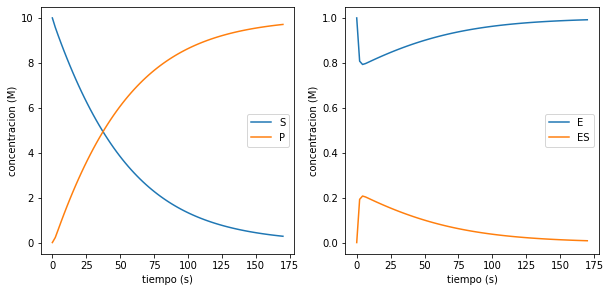

In [14]:
plt.figure(figsize = (10, 10))
plt.subplot(2,2,1)
plt.plot(time, S, time, P)
plt.xlabel("tiempo (s)")
plt.ylabel("concentracion (M)")
plt.legend(["S", "P"])
plt.subplot(2,2,2)
plt.plot(time, E, time, ES)
plt.xlabel("tiempo (s)")
plt.ylabel("concentracion (M)")
plt.legend(["E", "ES"])

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

from numba import jit,njit,float64,int32
import numba as nb

In [30]:
γr, kr, γp, kp = 1/5,1,1/45,50

In [31]:
@njit('f8[:](f8[:],f8)')
def Gillespie(trp0,tmax):
    
    '''
    Gillespie(trp0, tmax)

    Return a ndarray from the given initial state with the last times, number of mRNA and the last number of proteins.
    
    Parameters
    ----------
    trp0 : array like
        Array like with the initial state of a every single cell. It must be in this order: time,
        number of mRNA, number of proteins.
    tmax : int
        Maximum time to be run in the simulation
    
    Returns
    -------
    out : ndarray
        Array of the last time, number of mRNA and the last number of proteins obtained after the stochastic 
        simulation of a single system.    
    
    '''
    
    t,r,p =trp0 

    while t < tmax:
        s1 = kr
        s2 = γr*r
        s3 = kp*r
        s4 = γp*p
        st = s1+s2+s3+s4
        τ = (-1/st)*np.log(np.random.rand())
        x = np.random.rand()
        if(x< s1/st):
            r+=1
        elif(x<(s1+s2)/st):
            r-=1
        elif(x<(s1+s2+s3)/st):
            p+=1
        else:
            p-=1
        t+=τ
    return np.array([t,r,p]) 

In [22]:
@njit('f8[:](f8[:],f8)')
def Estado_celula(X0,tiempos):
    '''
    Estado_celula(X0,tiempos)

    Returns a matrix with the evolved genetic expression of a single cell.
    
    Parameters
    ----------
    X0 :ndarray 
        Vector with the system's initial state.
        It has as many rows as elements have tiempos and as many columns as evaluated chemical species.
    tiempos : numpy linspace, ndarray, array like
        Vector containing the sampling times to evolve the system.
    
    Returns
    -------
    out : matrix, 2D ndarray
        2D ndarray with the evolved system data.
    
    Example
    --------
    >>> x0 = np.array([0.0,0.0,0.0])             #time starts in 0.0, number of mRNA starts in 0.0 
                                                 #and number of proteins starts in 0.0, respectively.
                                               
    >>> Estado_celula(x0,np.linspace(0,200,10))  #Evolves a single cell with initial conditions x0 and a
                                                 #equispaced sampling time vector with 10 elements from 
                                                 #0 to 200. We chose only 10 elements for simplicity, but
                                                 #there are 50 by default. 
                                               
    array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
    [2.22233941e+01, 6.00000000e+00, 4.58400000e+03],
    [4.44470482e+01, 3.00000000e+00, 7.73200000e+03],
    [6.66697353e+01, 5.00000000e+00, 5.90500000e+03],
    [8.88922698e+01, 4.00000000e+00, 5.80100000e+03],
    [1.11113080e+02, 6.00000000e+00, 7.65800000e+03],
    [1.33335290e+02, 7.00000000e+00, 6.79300000e+03],
    [1.55556091e+02, 7.00000000e+00, 1.00870000e+04],
    [1.77778084e+02, 2.00000000e+00, 9.95200000e+03],
    [2.00003693e+02, 3.00000000e+00, 8.36100000e+03]])
    
    Note that the first row is the initial condition vector x0.

    '''
    
    X = np.zeros((len(tiempos),len(X0)))
    X[0] = X0
    
    for i in range(1,len(tiempos)):
        X[i] = Gillespie(X[i-1],tiempos[i])
    
    return X

TypingError: Failed in nopython mode pipeline (step: nopython frontend)
[1m[1m[1mInvalid use of Function(<built-in function len>) with argument(s) of type(s): (float64)
 * parameterized
[1mIn definition 0:[0m
[1m    All templates rejected with literals.[0m
[1mIn definition 1:[0m
[1m    All templates rejected without literals.[0m
[1mIn definition 2:[0m
[1m    All templates rejected with literals.[0m
[1mIn definition 3:[0m
[1m    All templates rejected without literals.[0m
[1mIn definition 4:[0m
[1m    All templates rejected with literals.[0m
[1mIn definition 5:[0m
[1m    All templates rejected without literals.[0m
[1mIn definition 6:[0m
[1m    All templates rejected with literals.[0m
[1mIn definition 7:[0m
[1m    All templates rejected without literals.[0m
[1mIn definition 8:[0m
[1m    All templates rejected with literals.[0m
[1mIn definition 9:[0m
[1m    All templates rejected without literals.[0m
[1mThis error is usually caused by passing an argument of a type that is unsupported by the named function.[0m[0m
[0m[1m[1] During: resolving callee type: Function(<built-in function len>)[0m
[0m[1m[2] During: typing of call at <ipython-input-22-cc137ea18735> (46)
[0m
[1m
File "<ipython-input-22-cc137ea18735>", line 46:[0m
[1mdef Estado_celula(X0,tiempos):
    <source elided>
    
[1m    X = np.zeros((len(tiempos),len(X0)))
[0m    [1m^[0m[0m


In [19]:
x0 = np.array([0.,0.,0.])
una_celula = Estado_celula(x0,np.linspace(0,200))
#una_celula

NameError: name 'Estado_celula' is not defined

NameError: name 'una_celula' is not defined

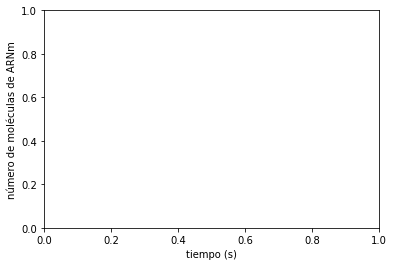

In [20]:
plt.xlabel('tiempo (s)')
plt.ylabel('número de moléculas de ARNm')
plt.step(una_celula[:,0],una_celula[:,1])

In [21]:
num_cel = 1000 #número de células 
celulas = np.array([Estado_celula(x0,np.arange(0.,700.,2.)) for i in tqdm(range(num_cel))])
print(celulas.shape)
celulas_prom = np.mean(celulas,axis=0) #axis = 0 saca el promedio componente a componente de cada célula.
#celulas_prom

  0%|          | 0/1000 [00:00<?, ?it/s]

NameError: name 'Estado_celula' is not defined

In [ ]:
plt.xlabel('Tiempo (minutos)')
plt.ylabel('Número de moléculas de proteína')
plt.plot(celulas_prom[:,0],celulas_prom[:,2])
for i in range(5):
    plt.plot(celulas[i,:,0],celulas[i,:,2],alpha=0.2)